<a href="https://colab.research.google.com/github/sriraj934/Handwriting-recognize-ml/blob/main/Handwriting_recognize_with_the_help_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Recognizing Handwritten digits** with the help of **Machine Learning** 

### Importing the Libraries

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
mnist = fetch_openml("mnist_784")

## Number of rows and column in the **dataset**

In [ ]:
mnist.data.shape

(70000, 784)

### **data Value**
NOTE : here 784 data is the number and 7000 is the data inside each number 

In [ ]:
print(mnist.target[0])

5


In [ ]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

## **First five dataset from index 0 to 4**

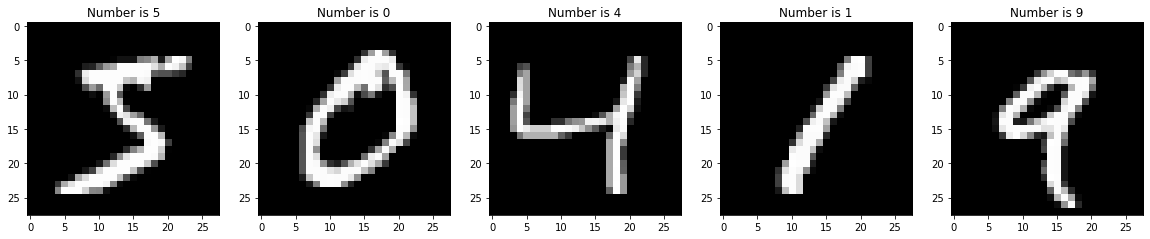

In [ ]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(mnist.data[:5],mnist.target[:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image,(28,28)),cmap="gray")
  plt.title("Number is %s"%label)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size = 0.2)

## Logistic **Regression**

In [ ]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train,y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test,y_test)
print(score)

0.9193571428571429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Prediction**

In [ ]:
mdl.predict([X_test[0]])[0]

'6'

prediction is 2


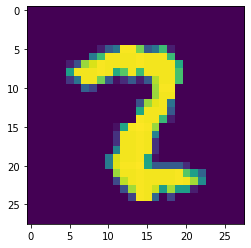

In [ ]:
index = 7
plt.imshow(np.reshape(X_test[index],(28,28)))
print("prediction is "+ mdl.predict([X_test[index]])[0])

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[1355,    0,    4,    4,    2,   11,   13,    2,   13,    1],
       [   0, 1562,    9,    4,    2,    4,    1,    5,   18,    1],
       [   8,   17, 1191,   23,   20,    8,   16,   15,   38,    6],
       [   4,    7,   32, 1278,    1,   37,    1,   13,   33,   14],
       [   2,    7,   11,    2, 1300,    2,    8,    6,   14,   55],
       [  16,    4,   10,   47,   10, 1084,   17,    6,   42,   12],
       [   5,    4,    5,    0,   19,   16, 1306,    2,    8,    1],
       [   5,    5,   10,    9,    8,    1,    1, 1389,    3,   52],
       [  10,   23,   16,   47,    3,   41,   15,    5, 1165,   18],
       [   8,    4,    6,   18,   39,   11,    1,   36,   16, 1241]])

NOTE : this diagonal one means correct predictions
but, if we take 0th row 
* 1355 correct prediction of 0
 * but

* 0 was predicted as 0 that was correct - 1355 
* 0 was predicted as  1 which was incorrect -0 times
* 0 was predicted as  2 - 8times incorrectly
* 0 was predicted as  3 - 4times incorecctly
* 0 was predicted as  4 - 2 times incorrectly
* 0 was predicted as  5 - 16times inccorectly
* 0 was predicted as  6 - 5times incorrectly
* 0 was predicted as  7 - 5times incorrectly
* 0 was predicted as  8 - 10times incorectly
* 0 was predicted as  9 - 8times incorrectly

NOTE:
the numbers are only taken from 0-9